In [2]:
import numpy as np # Numpy is a popular numeric computation package
import pandas as pd # Pandas is a friendly data wrangling package/library
from scipy import linalg
import matplotlib.pyplot as pl
from GPR import GPR
# Setting a specific random seed, to get reproducibility across students.
# @Students, you can remove or change to your own seed to try with your own training subsets.
np.random.seed(100) 
# Plotting
import plotly.express as px
import plotly.graph_objects as go
# Reproducibility
import watermark

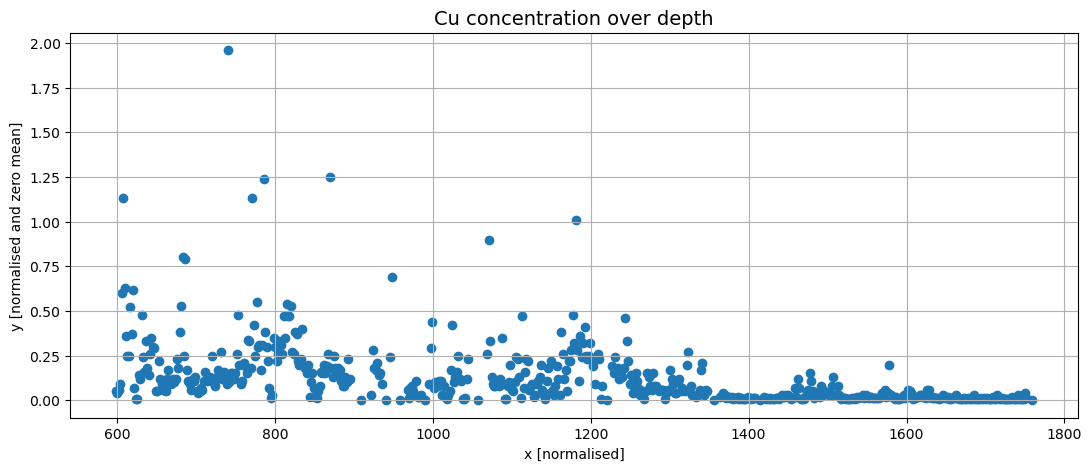

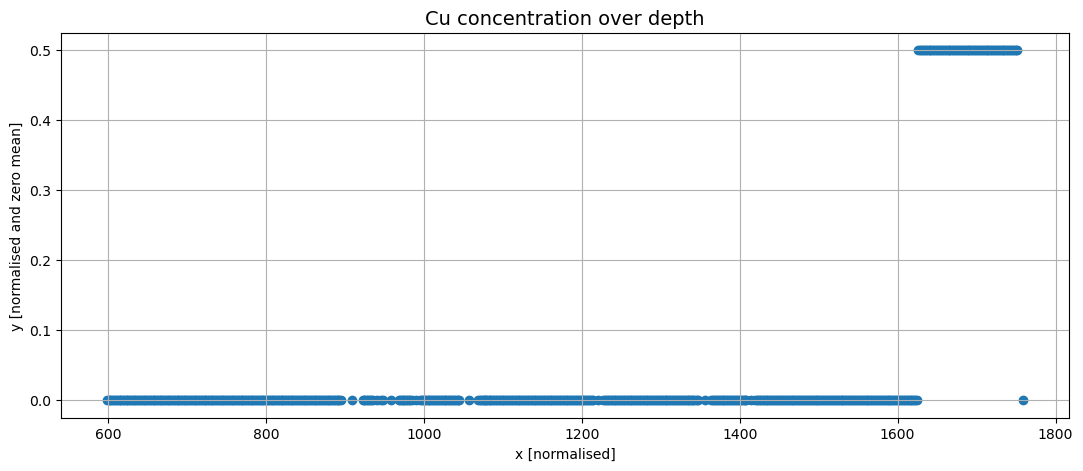

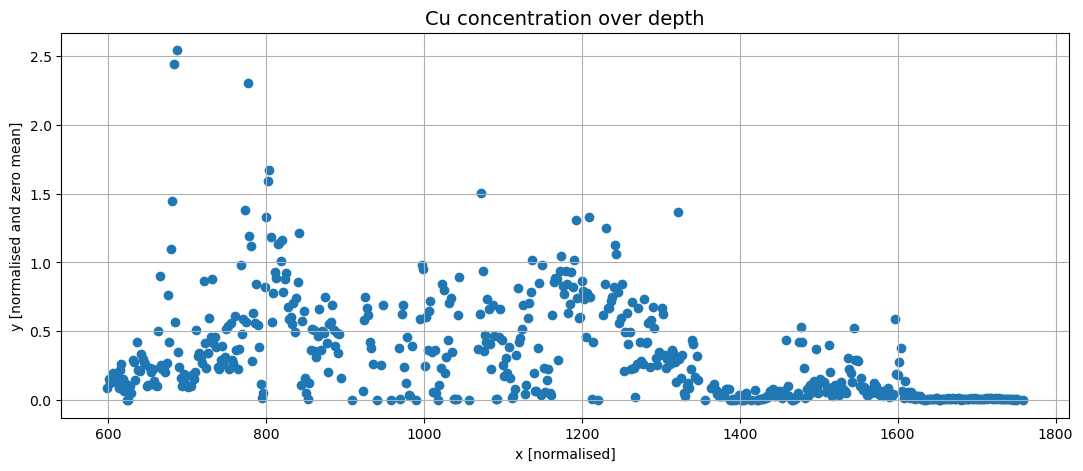

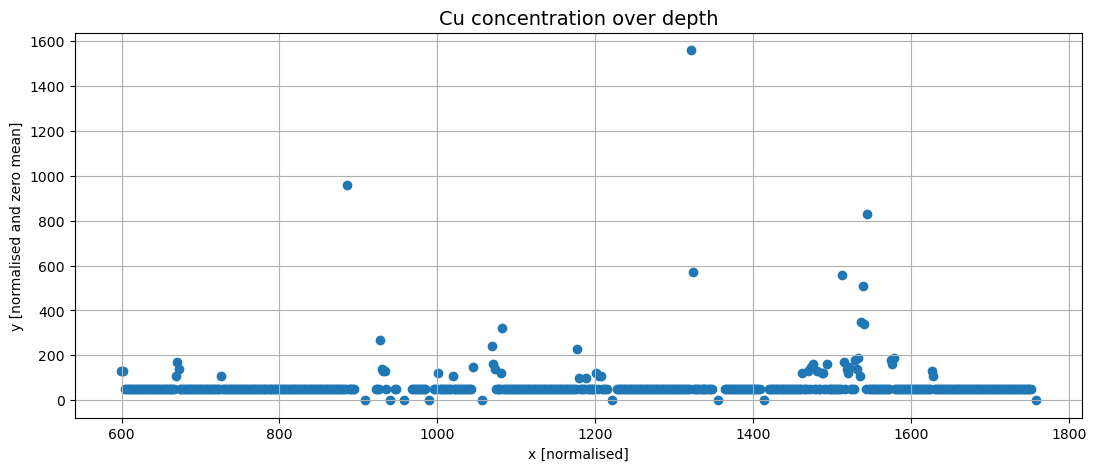

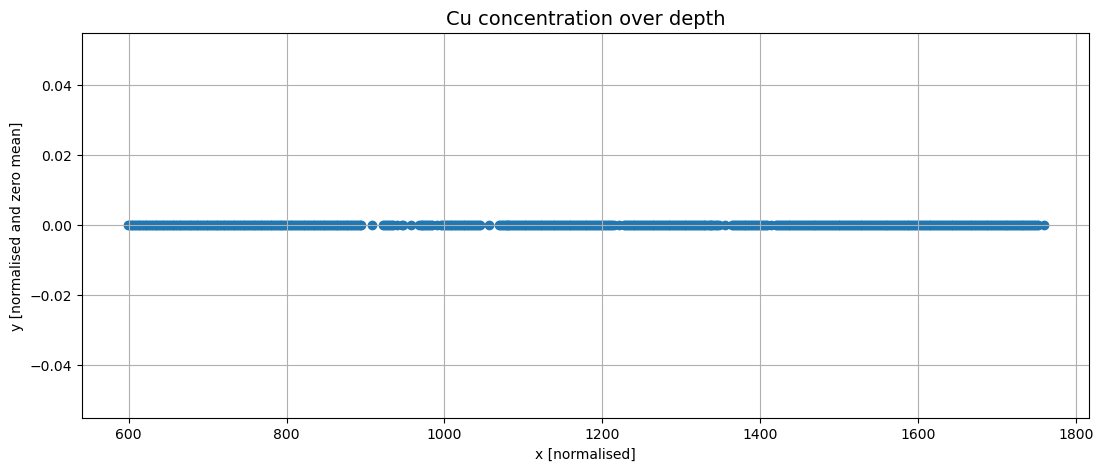

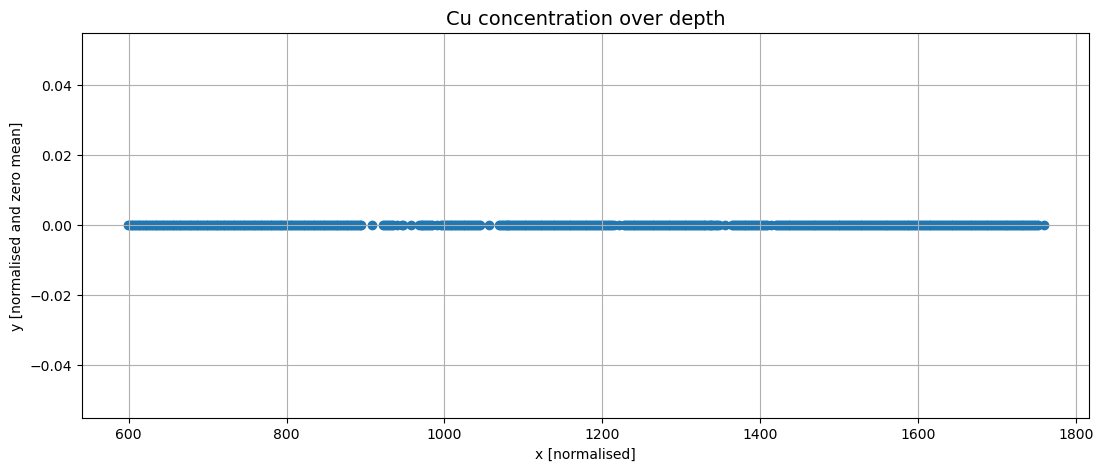

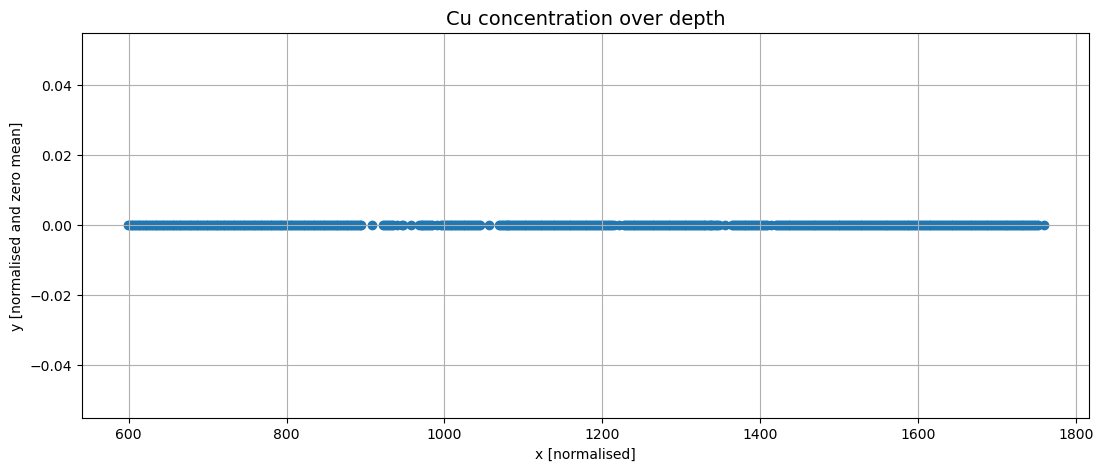

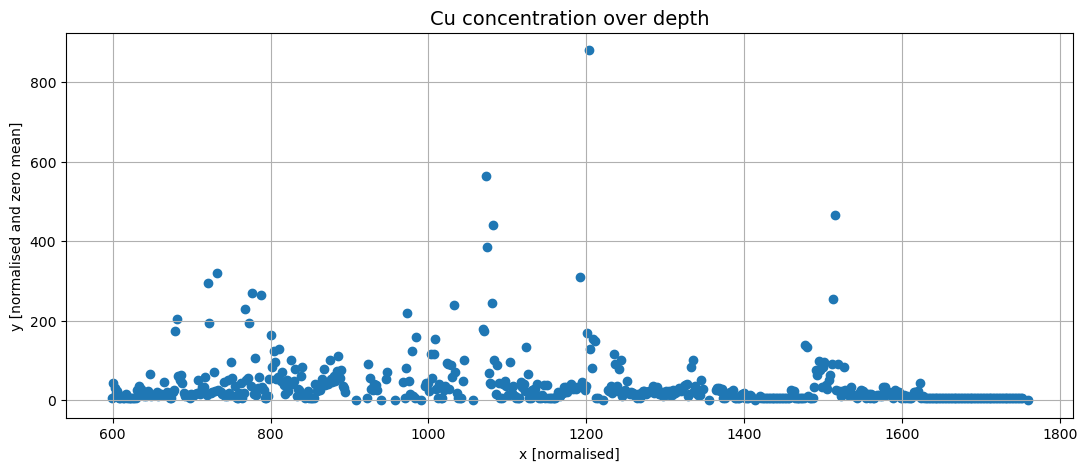

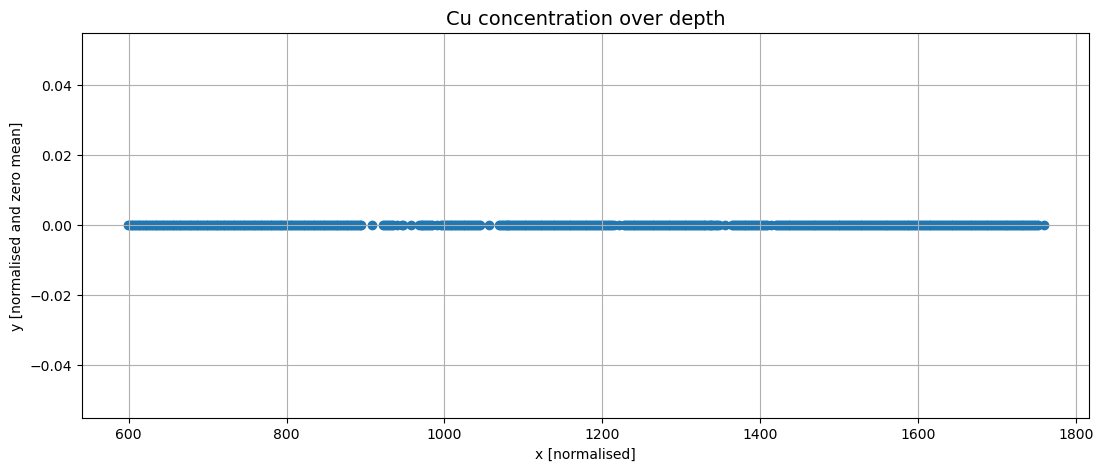

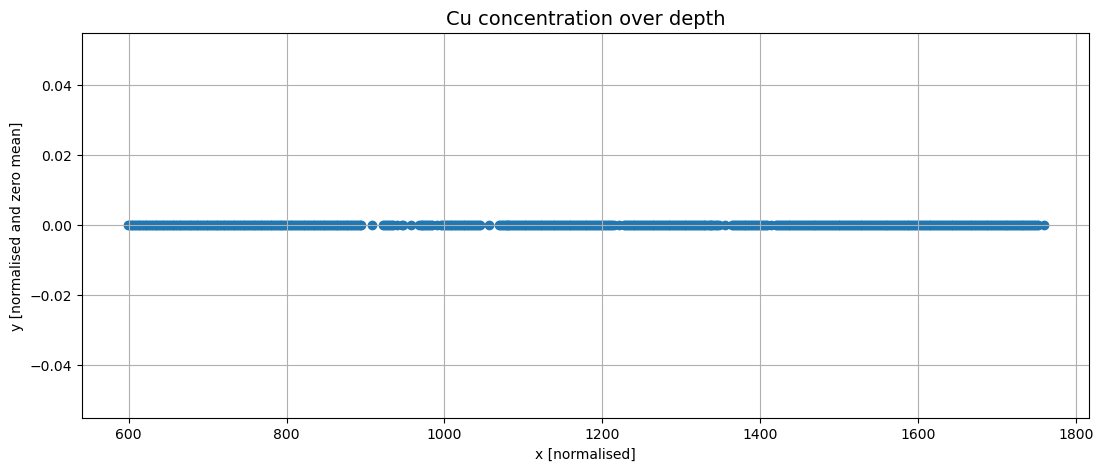

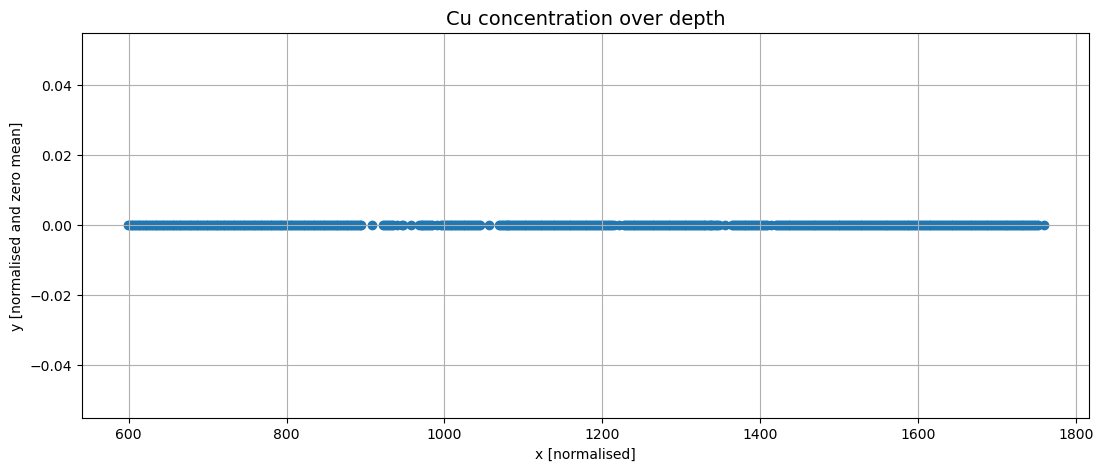

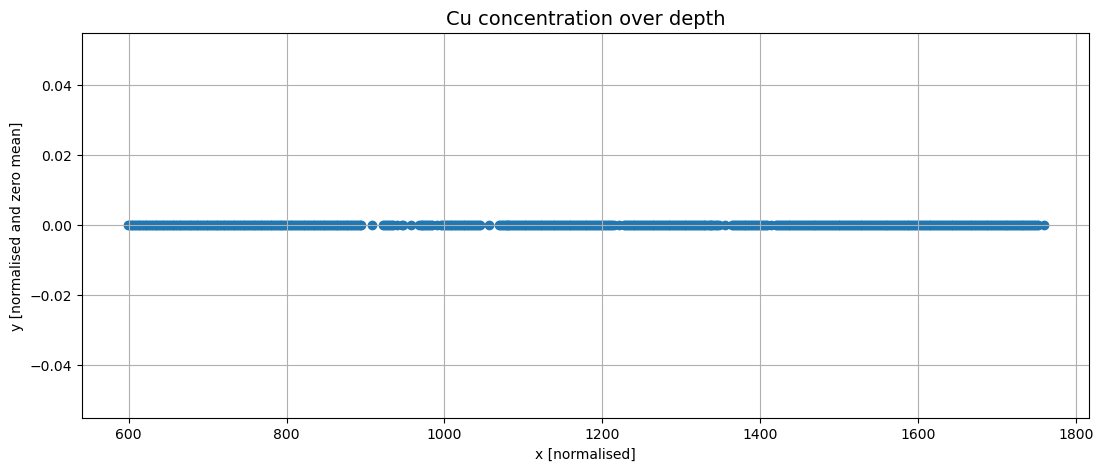

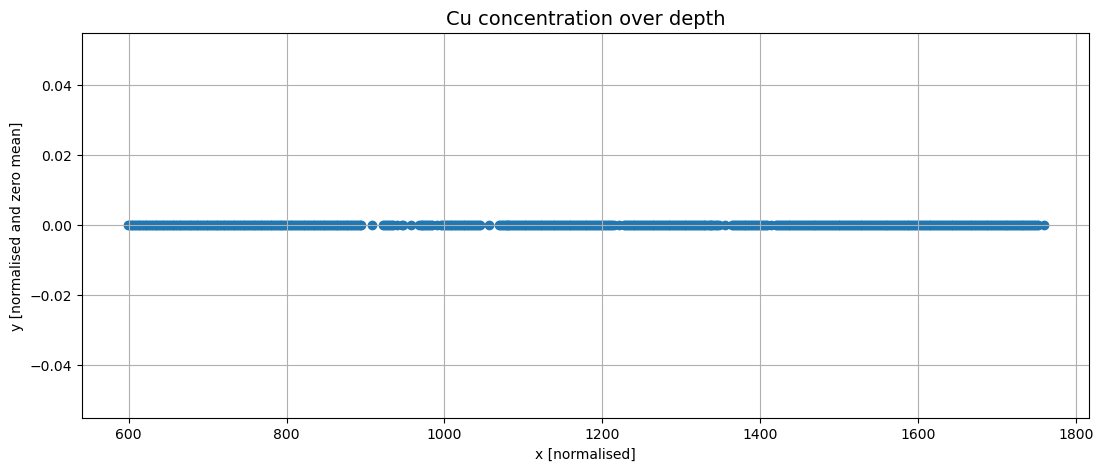

In [367]:
for mineral in ['Au_ppm',
       'Ag_ppm', 'Cu_pct', 'As_ppm', 'C_pct', 'F_ppm', 'Fe_pct', 'Mo_ppm',
       'S_pct', 'Pb_ppm', 'Zn_ppm', 'Cd_ppm', 'Hg_ppm']:

   pl.figure(figsize=(13, 5))
   pl.scatter(adt2['RL_mid_tf'],adt2[mineral])
   #pl.fill_between(val_x.ravel(), (f_mean_2-2*f_std_2).ravel(), (f_mean_2+2*f_std_2).ravel(), \
   #                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
   pl.title('Cu concentration over depth', fontsize=14)
   

   #pl.xlim([1500,1800])
   #pl.ylim([0,0.5])

   pl.xlabel('x [normalised]')
   pl.ylabel('y [normalised and zero mean]')
   pl.grid()

In [3]:
adt = pd.read_csv("../Warping-tests/engineered_data/assay_desurveyed_transformed_Mlith_domain.csv")
domained = pd.read_csv('../Warping-tests/engineered_data/blockmodel_domained_NN.csv')

In [4]:
mineral = 'Cu_pct'
hole = 'OTD1769'

In [6]:
# subset assay data by domains
adt_FLT_HBX_HWS = adt[adt["MLITHGROUPINGS2"] == "QMD"]
adt_FLT_HBX_HWS_Cu = adt_FLT_HBX_HWS.loc[:,["HOLEID", 'EAST_mid_tf', 'NORTH_mid_tf', 'RL_mid_tf', mineral]]

# NaN values causing trouble
#adt_FLT_HBX_HWS_Cu["Cu_pct"] = adt_FLT_HBX_HWS_Cu["Cu_pct"].fillna(0)
print(adt_FLT_HBX_HWS_Cu[mineral].isna().sum())
adt_FLT_HBX_HWS_Cu

0


,HOLEID,EAST_mid_tf,NORTH_mid_tf,RL_mid_tf,Cu_pct
25,OTD002,-243.230000,-4.720000,1725.980000,0.080
26,OTD002,-243.230000,-4.720000,1723.980000,0.100
27,OTD002,-243.230000,-4.720000,1721.980000,1.360
28,OTD002,-243.230000,-4.720000,1719.980000,0.280
29,OTD002,-243.230000,-4.720000,1717.980000,0.030
...,...,...,...,...,...
45547,UGD057,585.857338,1823.786208,418.545786,1.030
45548,UGD057,585.740563,1825.743063,418.151536,0.705
45549,UGD057,585.622978,1827.699688,417.756292,0.693
45550,UGD057,585.504531,1829.656085,417.360071,0.504


In [7]:
adt_FLT_HBX_HWS_Cu = adt_FLT_HBX_HWS_Cu.dropna(subset=[mineral])

In [8]:
adt_FLT_HBX_HWS_Cu['HOLEID'].value_counts()

OTD1770     442
OTD1769     419
OTD1417     312
OTD572      306
OTD1771     279
           ... 
UGD017        1
OTD1491       1
UGD015        1
OTRC2400      1
UGD021        1
Name: HOLEID, Length: 246, dtype: int64

In [9]:
adt_FLT_HBX_HWS_Cu = adt_FLT_HBX_HWS_Cu.loc[adt_FLT_HBX_HWS_Cu['HOLEID'] == hole]
adt_FLT_HBX_HWS_Cu

,HOLEID,EAST_mid_tf,NORTH_mid_tf,RL_mid_tf,Cu_pct
2931,OTD1769,132.660132,1160.371688,975.972265,0.2170
2932,OTD1769,133.452360,1160.420388,974.136417,0.5160
2933,OTD1769,134.244774,1160.469277,972.300658,0.4640
2934,OTD1769,135.037379,1160.518356,970.464987,0.7490
2935,OTD1769,135.830180,1160.567626,968.629409,0.4650
...,...,...,...,...,...
3480,OTD1769,584.414653,1199.344470,-65.253102,0.1130
3481,OTD1769,585.115024,1199.359382,-67.126129,0.0671
3482,OTD1769,585.814877,1199.373777,-68.999350,0.0867
3483,OTD1769,586.514211,1199.387645,-70.872763,0.1730


In [10]:
fig = px.histogram(adt_FLT_HBX_HWS_Cu[mineral], x = mineral,
                  title = "Distribution of raw Cu_pct values")
fig.show()

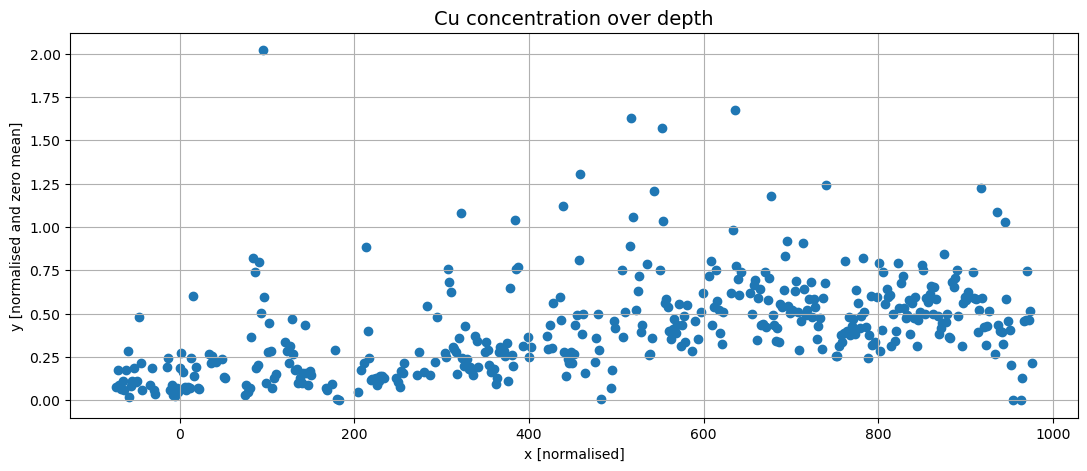

In [11]:
   pl.figure(figsize=(13, 5))
   pl.scatter(adt_FLT_HBX_HWS_Cu['RL_mid_tf'],adt_FLT_HBX_HWS_Cu[mineral])
   #pl.fill_between(val_x.ravel(), (f_mean_2-2*f_std_2).ravel(), (f_mean_2+2*f_std_2).ravel(), \
   #                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
   pl.title('Cu concentration over depth', fontsize=14)
   

   #pl.xlim([1500,1800])
   #pl.ylim([0,0.5])

   pl.xlabel('x [normalised]')
   pl.ylabel('y [normalised and zero mean]')
   pl.grid()

In [12]:
x = adt_FLT_HBX_HWS_Cu[['EAST_mid_tf','NORTH_mid_tf', 'RL_mid_tf']].values[:,np.newaxis] #[:,np.newaxis] makes the second dimension explicit
y = adt_FLT_HBX_HWS_Cu[mineral].values[:,np.newaxis] #[:,np.newaxis] makes the second dimension explicit
x = x.reshape(len(adt_FLT_HBX_HWS_Cu),3)

print(f"x has shape ({x.shape[0]},{x.shape[1]}) and has range [{np.min(x):.3f},{np.max(x):.3f}]")
print(f"y has shape ({y.shape[0]},{y.shape[1]}) and has range [{np.min(y):.3f},{np.max(y):.3f}]")

x has shape (419,3) and has range [-72.746,1199.401]
y has shape (419,1) and has range [0.001,2.020]


In [13]:
x = x[:,2].reshape(-1,1)

Training set contains 293 observations.
Testing set contains 126 observations.


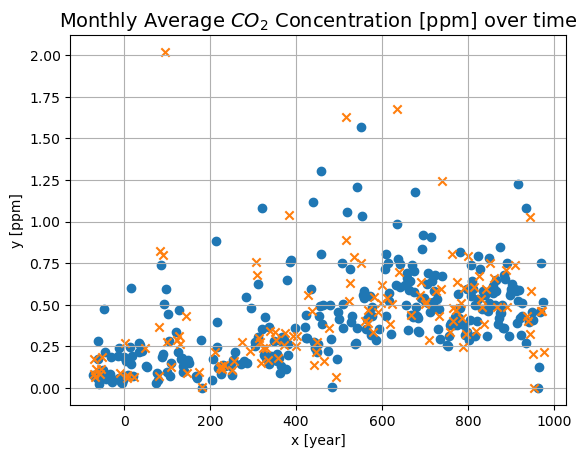

In [14]:
random_indices = np.random.permutation(x.shape[0])
train_ratio = .7
n_train = int(np.floor(x.shape[0]*train_ratio))
n_test = x.shape[0]-n_train
train_idx, test_idx = random_indices[:n_train], random_indices[n_train:]
train_idx.sort()
test_idx.sort()
x_train, x_test = x[train_idx,:], x[test_idx,:]
y_train, y_test = y[train_idx,:], y[test_idx,:]

print(f"Training set contains {y_train.shape[0]} observations.")
print(f"Testing set contains {y_test.shape[0]} observations.")

pl.scatter(x_train, y_train)
pl.scatter(x_test, y_test,marker="x")
pl.title('Monthly Average $CO_2$ Concentration [ppm] over time', fontsize=14)
pl.xlabel('x [year]')
pl.ylabel('y [ppm]')
pl.grid()

In [26]:
signal_variance = 1 #0.15
lengthscale = 1000 #50000
sigma_n = 1 #0.1
gp = GPR("Matern", x_train, y_train, [signal_variance,lengthscale], sigma_n, nu=5/2)
[f_mean_2,f_std_2] = gp.predict(x_test)
lml = gp.log_marginal_likelihood()

Log Marginal Likelihood: [[-281.47621067]]
0.4080161109409413 0.4282765873015874
0.5427250611795509 2.02


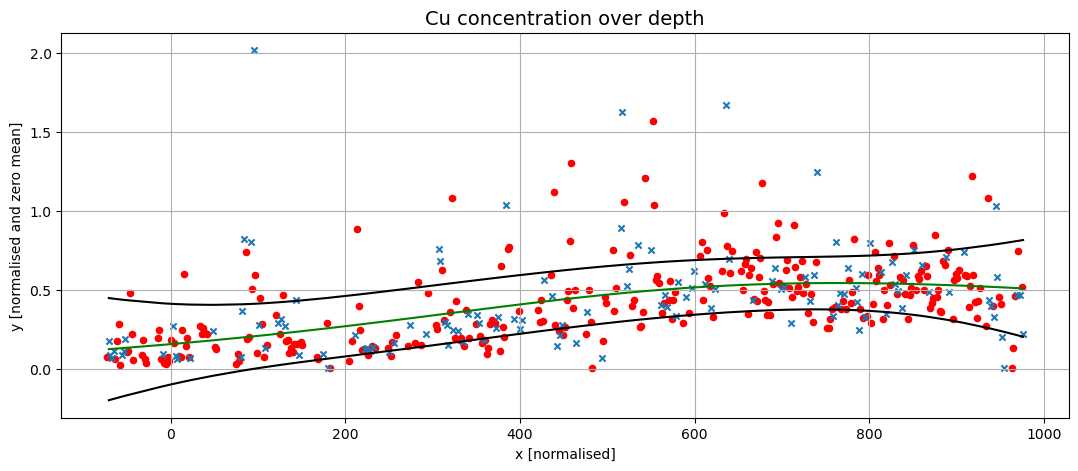

In [27]:
import seaborn as sns
print("Log Marginal Likelihood: "+str(lml))
print(np.mean(f_mean_2), np.mean(y_test))
print(np.max(f_mean_2), np.max(y_test))

pl.figure(figsize=(13, 5))
pl.scatter(x_train, y_train, s=20, color ='red')
pl.scatter(x_test, y_test,marker="x", s=20)
#pl.fill_between(val_x.ravel(), (f_mean_opt-2*f_std_2).ravel(), (f_mean_2+2*f_std_2).ravel(), \
#                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
sns.lineplot(x=x_test.reshape(-1), y=f_mean_2.reshape(-1),color ='g')

sns.lineplot(x=x_test.reshape(-1), y=(f_mean_2-2*f_std_2).reshape(-1),color ='black')
sns.lineplot(x=x_test.reshape(-1), y=(f_mean_2+2*f_std_2).reshape(-1),color ='black')


#sns.lineplot(x=x_test.reshape(-1), y=f_mean_2.reshape(-1),color ='g')
pl.title('Cu concentration over depth', fontsize=14)

#pl.xlim([1500,1800])
#pl.ylim([0,9])
pl.xlabel('x [normalised]')
pl.ylabel('y [normalised and zero mean]')
pl.grid()


In [28]:
gp.hyper_params

[1, 1000]

In [29]:
#gp = GPR("Matern", train_x_depth, train_y, [signal_variance,lengthscale], sigma_n, nu=5/2)
gp.fit()
gp.log_marginal_likelihood(), gp.optimal_params
[f_mean_opt,f_std_opt] = gp.predict(x_test)
lml_opt = gp.log_marginal_likelihood()

[1000.][[281.47621067]]
[1412.53754462][[280.97735849]]
[1995.26231497][[280.70398357]]
[2818.38293126][[280.60648359]]
[5623.4132519][[280.87495813]]
[3981.07170553][[280.66392939]]
[1995.26231497][[280.70398357]]
[3349.65439158][[280.61554008]]
[2371.37370566][[280.63571213]]
[3072.55736527][[280.60617051]]
[3349.65439158][[280.61554008]]
[2942.72717621][[280.60512735]]
[2818.38293126][[280.60648359]]
[3006.94164547][[280.60534778]]
[2879.88403322][[280.6055067]]
[2974.66113993][[280.60516244]]
[2911.13603407][[280.6052422]]
[2958.6510738][[280.60512613]]
[2974.66113993][[280.60516244]]
[2950.67838298][[280.60512206]]
[2942.72717621][[280.60512735]]
[2954.66203926][[280.60512292]]
[2946.70009771][[280.60512353]]
[2952.66953929][[280.6051222]]
[2948.68856942][[280.6051225]]
[2951.67379323][[280.60512205]]
[2952.66953929][[280.6051222]]
[2951.17604614][[280.60512204]]
[2950.67838298][[280.60512206]]
[2951.42490919][[280.60512204]]
[2950.92720407][[280.60512204]]
[2951.30047504][[280.60

In [30]:
gp.hyper_params

[1, 2951.19573083038]

Log Marginal Likelihood: [[-280.60512204]]
0.40913278522413393 0.4282765873015874
0.5759755568786875 2.02


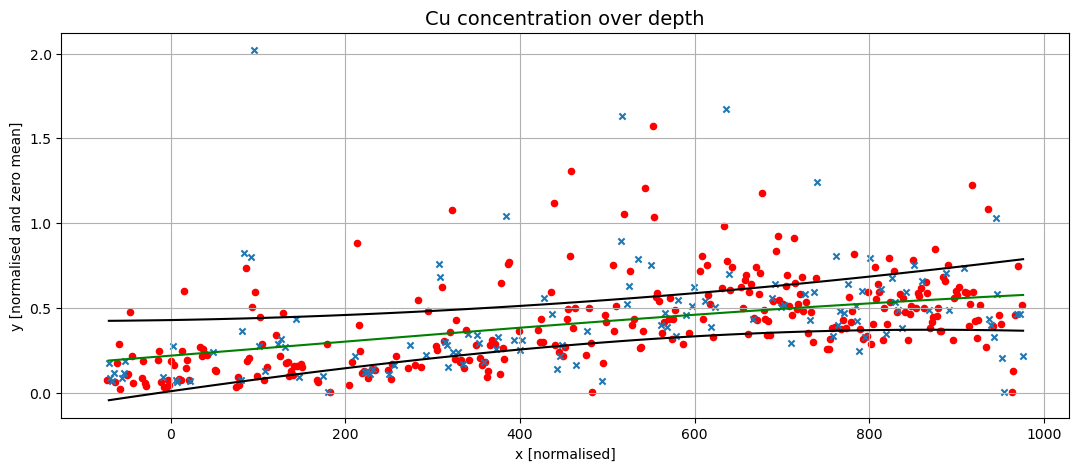

In [18]:

print("Log Marginal Likelihood: "+str(lml_opt))
print(np.mean(f_mean_opt), np.mean(y_test))
print(np.max(f_mean_opt), np.max(y_test))

pl.figure(figsize=(13, 5))
pl.scatter(x_train, y_train, s=20,color ='red')
pl.scatter(x_test, y_test,marker="x", s=20)
#pl.fill_between(val_x.ravel(), (f_mean_2-2*f_std_2).ravel(), (f_mean_2+2*f_std_2).ravel(), \
#                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
sns.lineplot(x=x_test.reshape(-1), y=(f_mean_opt-2*f_std_opt).reshape(-1),color ='black')
sns.lineplot(x=x_test.reshape(-1), y=(f_mean_opt+2*f_std_opt).reshape(-1),color ='black')

sns.lineplot(x=x_test.reshape(-1), y=f_mean_opt.reshape(-1),color ='g')
pl.title('Cu concentration over depth', fontsize=14)

#pl.xlim([1500,1800])
#pl.ylim([0,9])
pl.xlabel('x [normalised]')
pl.ylabel('y [normalised and zero mean]')
pl.grid()

In [19]:
I = 1
val_a = 5
val_b = 1
val_c = 0.01
a = np.full(I, val_a)
b = np.full(I, val_b)
c = np.full(I, val_c)

signal_variance = 1 #0.15
lengthscale = 1000 #50000
sigma_n = 1 #0.1
gpw = GPR("Matern", x_train, y_train, [signal_variance,lengthscale], sigma_n, [a,b,c], nu=5/2)

Log Marginal Likelihood: [[42.7945673]]
0.4080161109409413 0.4282765873015874
0.5427250611795509 2.02


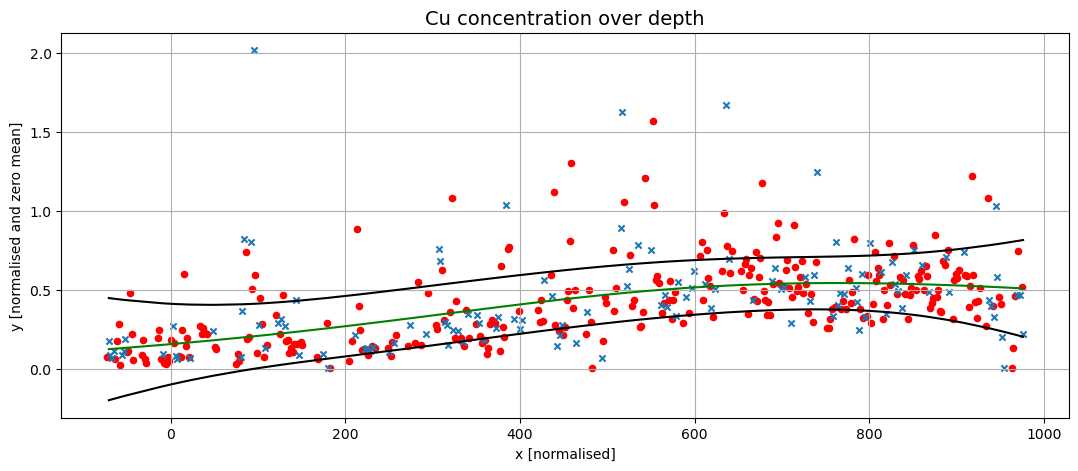

In [20]:
[fw_mean_2,fw_std_2] = gpw.predict_original(x_test)
lmlw = gpw.log_marginal_likelihood()
print("Log Marginal Likelihood: "+str(lmlw))
print(np.mean(fw_mean_2), np.mean(y_test))
print(np.max(fw_mean_2), np.max(y_test))
pl.figure(figsize=(13, 5))
pl.scatter(x_train, y_train, s=20,color='red')
pl.scatter(x_test, y_test,marker="x", s=20)
#pl.fill_between(x_test.ravel(), (f_mean_2-2*f_std_2).ravel(), (f_mean_2+2*f_std_2).ravel(), \
#                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
#pl.plot(x_test, f_mean_2,'g')
sns.lineplot(x=x_test.reshape(-1), y=fw_mean_2.reshape(-1),color='green')

sns.lineplot(x=x_test.reshape(-1), y=(fw_mean_2-2*fw_std_2).reshape(-1),color ='black')
sns.lineplot(x=x_test.reshape(-1), y=(fw_mean_2+2*fw_std_2).reshape(-1),color ='black')

pl.title('Cu concentration over depth', fontsize=14)

#pl.xlim([1500,1800])
#pl.ylim([0,9])
pl.xlabel('x [normalised]')
pl.ylabel('y [normalised and zero mean]')
pl.grid()
fw_norm_train = 0
fw_norm_test = 0
for i in range(I):
    fw_norm_train += a[i]* np.tanh(b[i] * (y_train + c[i])) 
    fw_norm_test += a[i] * np.tanh(b[i] * (y_test + c[i])) 

In [21]:
gpw.fit()

[fw_mean_opt,fw_std_opt] = gpw.predict_original(x_test)
lmlw_opt = gpw.log_marginal_likelihood()
a = [gpw.optimal_params[1]]
b = [gpw.optimal_params[2]]
c = [gpw.optimal_params[3]]
print(gpw.optimal_params)


c:\Users\23478671\Github\Warped-GPs-\GPR.py:128: OptimizeWarning:

Unknown solver options: xatol



[1.e+03 5.e+00 1.e+00 1.e-02][[-42.7945673]]
[1.e+03 5.e+00 1.e+00 1.e-02][[-42.7945673]]
[2.71828183e+03 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-33.38386536]]
[1.98288151e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-39.04203796]]
[1.e+03 5.e+00 1.e+00 1.e-02][[-42.7945673]]
[5.3900309e+02 5.0000000e+00 1.0000000e+00 1.0000000e-02][[-43.71776101]]
[3.67879447e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-42.5648774]]
[6.22166813e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-43.86362761]]
[6.37497697e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-43.86835563]]
[6.42392212e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-43.86856359]]
[6.45241459e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-43.86840195]]
[6.42392212e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-43.86856359]]
[6.42392212e+02 1.35914091e+01 1.00000000e+00 1.00000000e-02][[209.29548387]]
[6.42392212e+02 9.91440753e-01 1.00000000e+00 1.00000000e-02][[348.09217752]]
[6.42392212e

Log Marginal Likelihood: [[66.9964037]]
0.40553183246826846 0.4282765873015874
0.5617423419869467 2.02


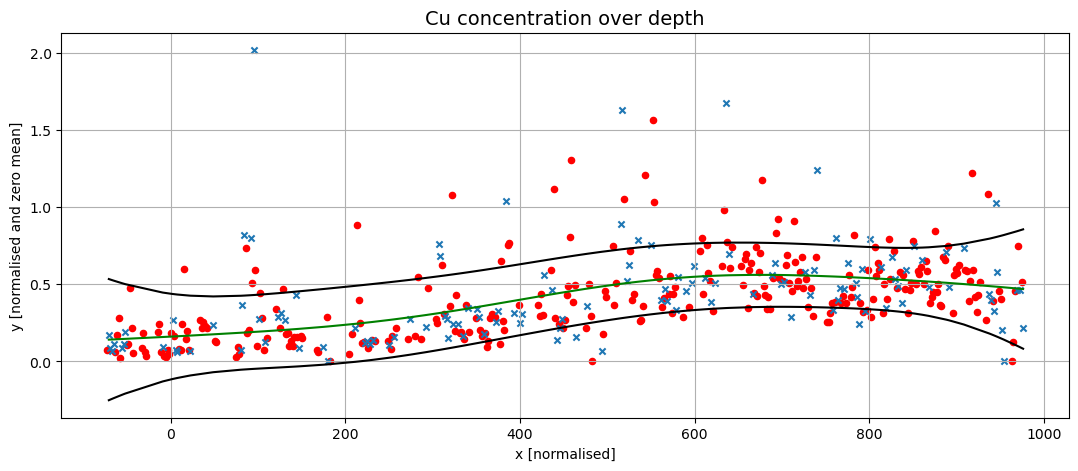

In [22]:
import seaborn as sns

fw_norm_train = 0
fw_norm_test = 0
for i in range(I):
    fw_norm_train += a[i]* np.tanh(b[i] * (y_train + c[i])) 
    fw_norm_test += a[i] * np.tanh(b[i] * (y_test + c[i])) 

print("Log Marginal Likelihood: "+str(lmlw_opt))
print(np.mean(fw_mean_opt), np.mean(y_test))
print(np.max(fw_mean_opt), np.max(y_test))

pl.figure(figsize=(13, 5))
sns.lineplot(x=x_test.reshape(-1), y=fw_mean_opt.reshape(-1),color='green')

sns.lineplot(x=x_test.reshape(-1), y=(fw_mean_opt-2*fw_std_opt).reshape(-1),color ='black')
sns.lineplot(x=x_test.reshape(-1), y=(fw_mean_opt+2*fw_std_opt).reshape(-1),color ='black')
#pl.scatter(x_train, fw_norm_train)
#pl.scatter(x_test, fw_norm_test,marker="x")
pl.scatter(x_train, y_train, s=20, color='red')
pl.scatter(x_test, y_test,marker="x", s=20)
#pl.fill_between(val_x.ravel(), (f_mean_2-2*f_std_2).ravel(), (f_mean_opt+2*f_std_2).ravel(), \
#                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
pl.title('Cu concentration over depth', fontsize=14)

#pl.xlim([0,200])
#pl.ylim([0,9])
pl.xlabel('x [normalised]')
pl.ylabel('y [normalised and zero mean]')
pl.grid()


In [23]:
[f_mean,f_std] = gp.predict(x_test)
[fw_mean,fw_std] = gpw.predict_original(x_test)

In [24]:
mae = np.mean(np.abs(f_mean - y_test))
mae2 = np.mean(np.abs(fw_mean - y_test))

print("GP MAE:","%.3f" % mae )
print("GP warp MAE:", "%.3f" % mae2 )

GP MAE: 0.183
GP warp MAE: 0.174


In [37]:
mape = np.mean(np.abs((f_mean - y_test)/y_test))*100
mape2 = np.mean(np.abs((fw_mean - y_test)/y_test))*100

print("GP MAPE:", "%.1f" % mape,'%' )
print("GP warp MAPE:","%.1f" % mape2,'%')

GP MAPE: 740.0 %
GP warp MAPE: 622.4 %


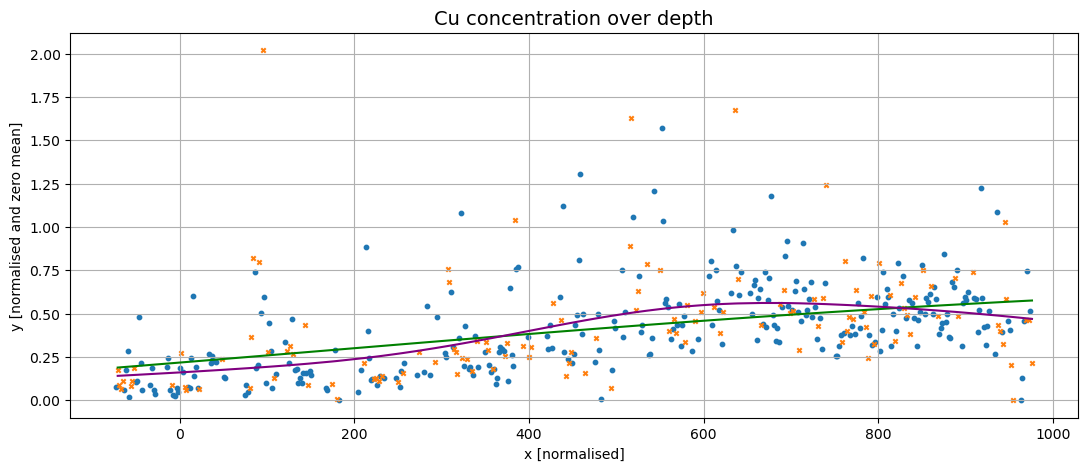

In [38]:
pl.figure(figsize=(13, 5))
pl.scatter(x_train, y_train, s=10)
pl.scatter(x_test, y_test,marker="x", s=10)
#pl.fill_between(val_x.ravel(), (f_mean_2-2*f_std_2).ravel(), (f_mean_2+2*f_std_2).ravel(), \
#                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
sns.lineplot(x=x_test.reshape(-1), y=f_mean.reshape(-1),color ='g')
sns.lineplot(x=x_test.reshape(-1), y=fw_mean.reshape(-1),color ='purple')

pl.title('Cu concentration over depth', fontsize=14)

#pl.xlim([1500,1800])
#pl.ylim([0,9])
pl.xlabel('x [normalised]')
pl.ylabel('y [normalised and zero mean]')
pl.grid()